In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
folder = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\StarDist Segmentation Models"
df = pd.read_csv(os.path.join(folder, "retraining.csv"))
df

,Start,Tissue,LR,Epochs,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality
0,SD_HE_20x,FallopianTube,0.00001,0,0.5,1078,243,630,0.816048,0.631148,0.711786,0.520846
1,SD_HE_20x,FallopianTube,0.00001,1,0.5,1256,344,452,0.785000,0.735363,0.759371,0.549295
2,SD_HE_20x,FallopianTube,0.00001,2,0.5,1263,281,445,0.818005,0.739461,0.776753,0.566078
3,SD_HE_20x,FallopianTube,0.00001,3,0.5,1255,277,453,0.819191,0.734778,0.774691,0.569260
4,SD_HE_20x,FallopianTube,0.00001,4,0.5,1273,304,435,0.807229,0.745316,0.775038,0.569862
...,...,...,...,...,...,...,...,...,...,...,...,...
274,Random,Skin,0.00030,600,0.5,1081,243,454,0.816465,0.704235,0.756208,0.554900
275,Random,Skin,0.00030,700,0.5,1067,233,468,0.820769,0.695114,0.752734,0.553699
276,Random,Skin,0.00030,800,0.5,1065,249,470,0.810502,0.693811,0.747631,0.547355
277,Random,Skin,0.00030,900,0.5,1059,250,476,0.809015,0.689902,0.744726,0.545893


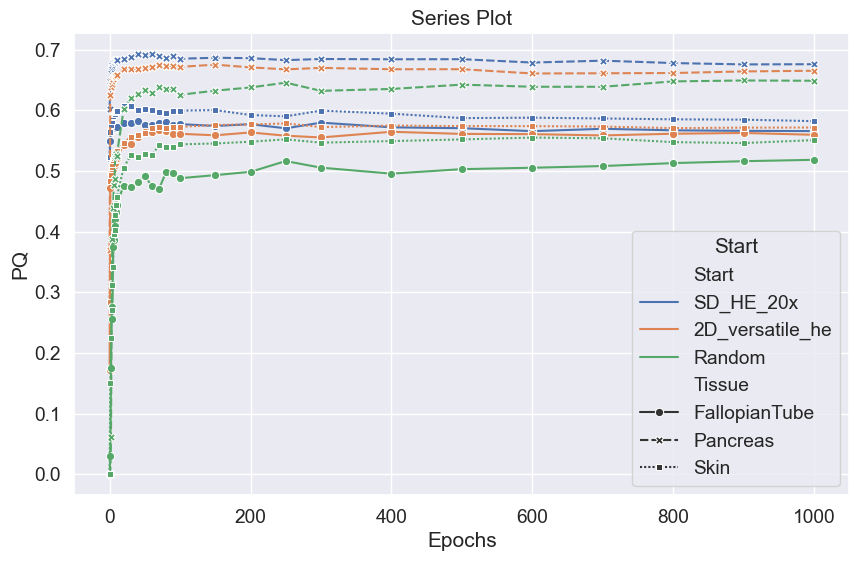

In [10]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epochs', y='Panoptic Quality', hue='Start', style='Tissue', markers=True)
plt.title('Series Plot')
plt.xlabel('Epochs')
plt.ylabel('PQ')
plt.legend(title='Start')
plt.show()

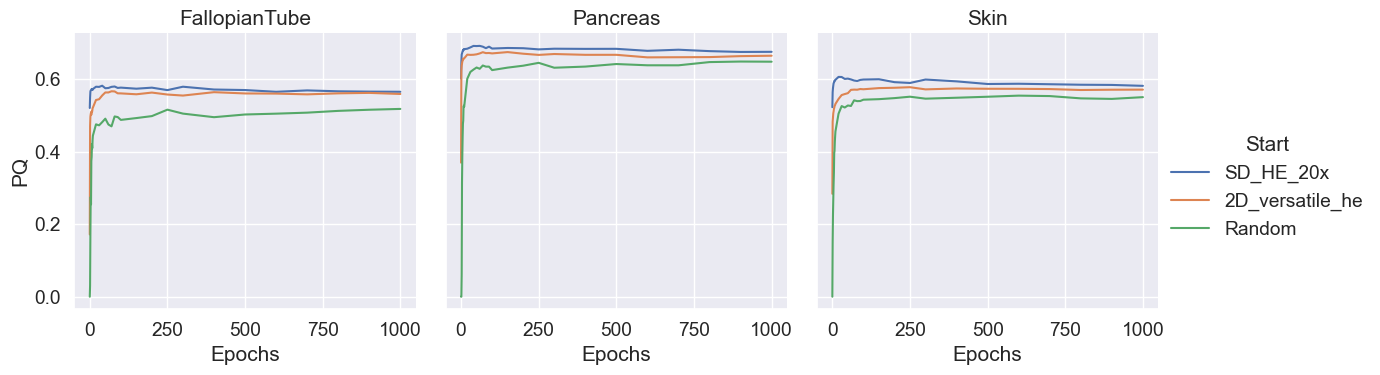

In [11]:
g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4)
g.map(sns.lineplot, "Epochs", "Panoptic Quality")
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "PQ")
g.add_legend(title="Start")
plt.show()

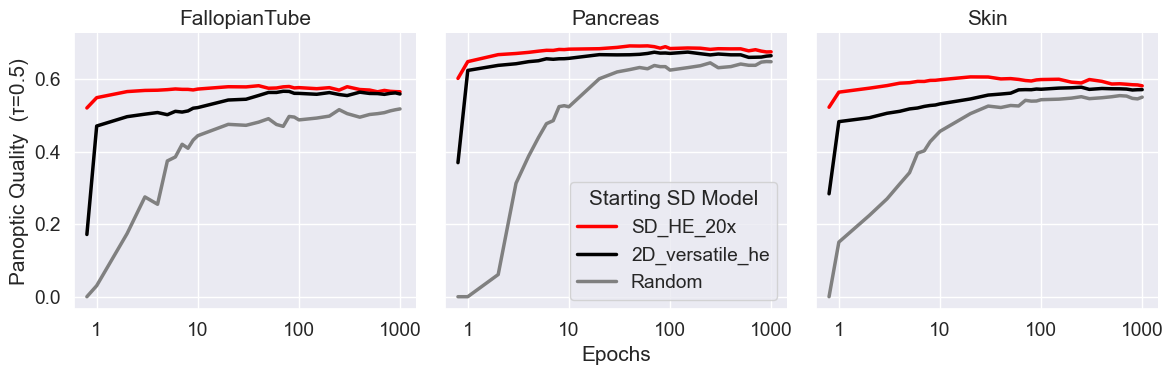

In [12]:
df['Epochs'] = df['Epochs'].replace(0, 0.8)

sns.set_style("darkgrid")
sns.set_theme(font_scale=1.25)
custom_palette = {'SD_HE_20x': 'red', '2D_versatile_he': 'black', 'Random': 'gray'}

g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4, palette=custom_palette)
g.map(sns.lineplot, "Epochs", "Panoptic Quality", linewidth=2.5)
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "Panoptic Quality  (τ=0.5)")
for i, ax in enumerate(g.axes.flat):
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))
    ax.set_xlim(left=0.6)
    if i == 0 or i == 2:
        ax.set_xlabel(None)
g.axes[1].legend(title="Starting SD Model", bbox_to_anchor=(1, 0.0), loc='lower right')
plt.savefig(os.path.join(folder, 'retrain_charts.png'), bbox_inches='tight')
plt.show()

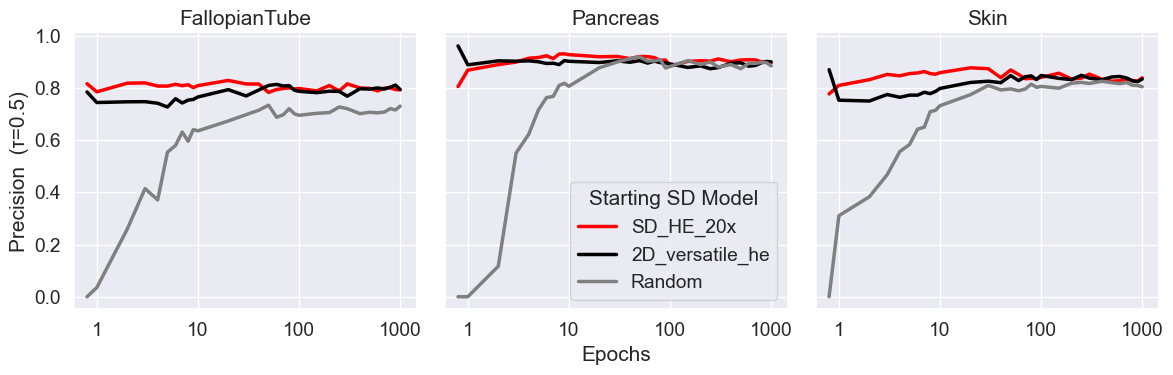

In [13]:
sns.set_style("darkgrid")
sns.set_theme(font_scale=1.25)
custom_palette = {'SD_HE_20x': 'red', '2D_versatile_he': 'black', 'Random': 'gray'}

g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4, palette=custom_palette)
g.map(sns.lineplot, "Epochs", "Precision", linewidth=2.5)
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "Precision  (τ=0.5)")
for i, ax in enumerate(g.axes.flat):
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))
    ax.set_xlim(left=0.6)
    if i == 0 or i == 2:
        ax.set_xlabel(None)
g.axes[1].legend(title="Starting SD Model", bbox_to_anchor=(1, 0.0), loc='lower right')
plt.savefig(os.path.join(folder, 'retrain_charts_precision.png'), bbox_inches='tight')
plt.show()

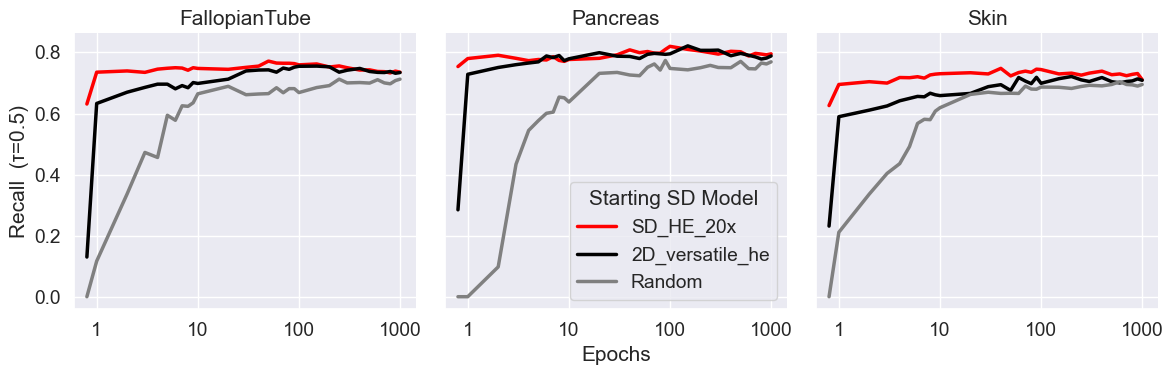

In [14]:
sns.set_style("darkgrid")
sns.set_theme(font_scale=1.25)
custom_palette = {'SD_HE_20x': 'red', '2D_versatile_he': 'black', 'Random': 'gray'}

g = sns.FacetGrid(df, col="Tissue", hue="Start", col_wrap=3, height=4, palette=custom_palette)
g.map(sns.lineplot, "Epochs", "Recall", linewidth=2.5)
g.set_titles("{col_name}")
g.set_axis_labels("Epochs", "Recall  (τ=0.5)")
for i, ax in enumerate(g.axes.flat):
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))
    ax.set_xlim(left=0.6)
    if i == 0 or i == 2:
        ax.set_xlabel(None)
g.axes[1].legend(title="Starting SD Model", bbox_to_anchor=(1, 0.0), loc='lower right')
plt.savefig(os.path.join(folder, 'retrain_charts_recall.png'), bbox_inches='tight')
plt.show()